## Observations and Insights 

In [290]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [291]:
# Checking the number of mice.
mice_count = mouse_data['Mouse ID'].value_counts().count()
mice_count

249

In [292]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [293]:
# Optional: Get all the data for the duplicate mouse ID. 



In [294]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_data = mouse_data.drop_duplicates(['Mouse ID','Timepoint'],keep=False,ignore_index=False)
mouse_data = mouse_data.set_index('Mouse ID').drop('g989').reset_index()
#mouse_data = mouse_data.drop('g989')
#mouse_data = mouse_data.reset_index()
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [295]:
# Checking the number of mice in the clean DataFrame.
mice_count = mouse_data['Mouse ID'].value_counts().count()
mice_count

248

## Summary Statistics

In [296]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group_mean = mouse_data.groupby('Drug Regimen').mean()
drug_group_mean = drug_group_mean['Tumor Volume (mm3)'].tolist()

drug_group_median = mouse_data.groupby('Drug Regimen').median()
drug_group_median = drug_group_median['Tumor Volume (mm3)'].tolist()

drug_group_var = mouse_data.groupby('Drug Regimen').var()
drug_group_var = drug_group_var['Tumor Volume (mm3)'].tolist()

drug_group_std = mouse_data.groupby('Drug Regimen').std()
drug_group_std = drug_group_std['Tumor Volume (mm3)'].tolist()

drug_group_sem = mouse_data.groupby('Drug Regimen').sem()
drug_group_sem = drug_group_sem['Tumor Volume (mm3)'].tolist()

# Assemble the resulting series into a single summary dataframe.
drug_list = mouse_data['Drug Regimen'].unique().tolist()

drug_df1 = pd.DataFrame({'Drug Regimen' : drug_list,
                        'Mean Tumor Volume' : drug_group_mean, 
                         'Median Tumor Volume' : drug_group_median,
                         'Tumor Volume Variance' : drug_group_var,
                         'Tumor Volume Std Dev' : drug_group_std,
                        'Tumor Volume Std Err' : drug_group_sem})

#print(drug_group_median)
#print(drug_group_mean)
#print(drug_group_var)
#print(drug_group_std)
#print(drug_group_sem)
#print(drug_list)
drug_df1.set_index('Drug Regimen')

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Placebo,54.233149,52.431737,59.450562,7.710419,0.573111


In [297]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df = pd.DataFrame(mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : [np.mean,
                                                                                       np.median,
                                                                                       np.var,
                                                                                       np.std,
                                                                                       st.sem]}))
                                                              
drug_df.style.format("{:.4f}")
# drug_df

## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Tested by Drug'}, xlabel='Drug Regimen', ylabel='Mice Tested'>

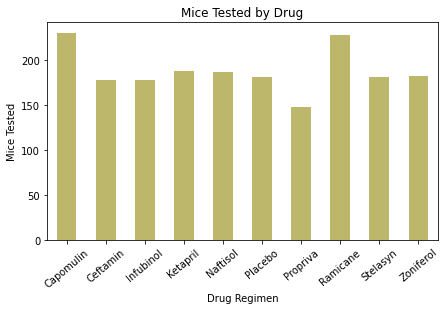

In [298]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_count = mouse_data.groupby('Drug Regimen')['Mouse ID'].count()

drug_count.plot(kind='bar',
                ylabel='Mice Tested',
                title='Mice Tested by Drug',
                color='darkkhaki',
                figsize=(7,4),
                rot=40)


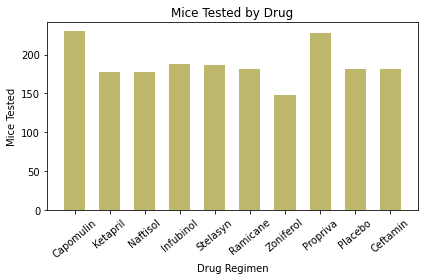

In [299]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#drug_count = drug_count.tolist()
plt.bar(drug_list, drug_count.tolist(), width=0.6, color='darkkhaki')
plt.xticks(rotation=40)
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Tested')
plt.title('Mice Tested by Drug')
plt.tight_layout()
plt.show()

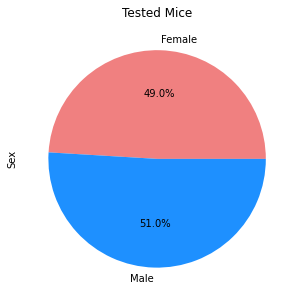

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_data.groupby('Sex')['Mouse ID'].count()

#gender_count.plot(kind='pie', ylabel='Sex')
gender_count.plot.pie(ylabel='Sex',
                      title='Tested Mice', 
                      colors=['lightcoral','dodgerblue'], 
                      autopct = '%1.1f%%', 
                      figsize=(5,5))

plt.show()

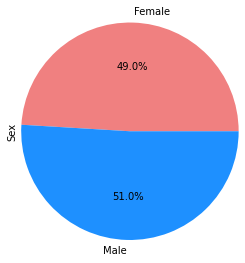

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.tolist(),
        labels=['Female','Male'],
        colors=['lightcoral','dodgerblue'],
        autopct='%.1f%%',
        radius=1.25)

plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [302]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time = mouse_data.groupby('Mouse ID').agg({'Timepoint':'max'}).reset_index()
# mouse_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_last_time = pd.merge(mouse_data, mouse_time, how='right')

mouse_last_time


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [303]:
# Find the number of mice that made it to the end of the study for each drug
mice_45 = mouse_last_time.loc[mouse_last_time['Timepoint'] == 45]



for drug in drug_list:
    y = mice_45.loc[mice_45['Drug Regimen'] == drug]
    print(f"{drug} had {y.value_counts().count()} mice survive until the end of the study.")



Capomulin had 21 mice survive until the end of the study.
Ketapril had 11 mice survive until the end of the study.
Naftisol had 13 mice survive until the end of the study.
Infubinol had 9 mice survive until the end of the study.
Stelasyn had 11 mice survive until the end of the study.
Ramicane had 20 mice survive until the end of the study.
Zoniferol had 14 mice survive until the end of the study.
Propriva had 7 mice survive until the end of the study.
Placebo had 11 mice survive until the end of the study.
Ceftamin had 13 mice survive until the end of the study.


In [304]:
# Put treatments into a list for for loop (and later for plot labels)
cripp = ['Capomulin', 'Ramicane', 'Infubinol', 'Propriva', 'Placebo']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in cripp:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x = mouse_last_time.loc[mouse_last_time['Drug Regimen'] == drug]
    tum_vol.append(x['Tumor Volume (mm3)'])
    # add subset   
    
    # Determine outliers using upper and lower bounds
    quartiles = x['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    upper_outliers = [volume for volume in x['Tumor Volume (mm3)'] if volume > upper_bound]
    lower_outliers = [volume for volume in x['Tumor Volume (mm3)'] if volume < lower_bound]
    
    print(f"Upper outliers for {drug} are: {upper_outliers}")
    print(f"Lower outliers for {drug} are: {lower_outliers}")
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")

Upper outliers for Capomulin are: []
Lower outliers for Capomulin are: []
Upper outliers for Ramicane are: []
Lower outliers for Ramicane are: []
Upper outliers for Infubinol are: []
Lower outliers for Infubinol are: [36.321345799999996]
Upper outliers for Propriva are: []
Lower outliers for Propriva are: []
Upper outliers for Placebo are: []
Lower outliers for Placebo are: []


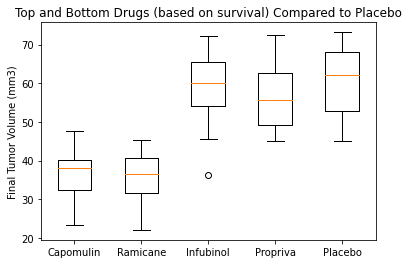

In [305]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tum_vol)
plt.title('Top and Bottom Drugs (based on survival) Compared to Placebo')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4,5],cripp)
plt.show()

## Line and Scatter Plots

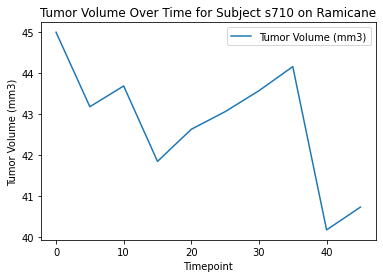

In [314]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_data.loc[mouse_data['Drug Regimen'] == 'Capomulin']
s710 = capomulin_df.loc[capomulin_df['Mouse ID'] == 's710']
capomulin_df

s710_chart = s710[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
s710_chart.plot.line(ylabel='Tumor Volume (mm3)', title='Tumor Volume Over Time for Subject s710 on Ramicane')

plt.show()

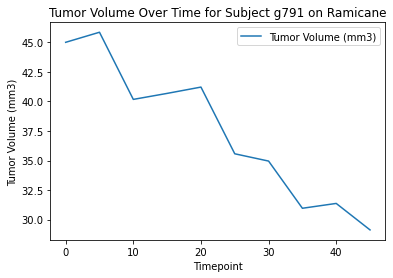

In [312]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Ramicane

ramicane_df = mouse_data.loc[mouse_data['Drug Regimen'] == 'Ramicane']
g791 = ramicane_df.loc[ramicane_df['Mouse ID'] == 'g791']
ramicane_df

g791_chart = g791[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
g791_chart.plot.line(ylabel='Tumor Volume (mm3)', title='Tumor Volume Over Time for Subject g791 on Ramicane')

# ramicane_chart = ramicane_df[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
# ramicane_chart.plot.line(ylabel='Tumor Volume (mm3)', title='Tumor Volume Over Time for Subjects on Ramicane')
# ramicane_df['Mouse ID'].value_counts().count()

plt.show()

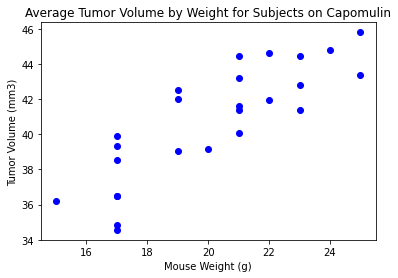

In [263]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ccapomulin_group = capomulin_df.groupby('Mouse ID').mean()

x1 = capomulin_group['Weight (g)'].tolist()
y1 = capomulin_group['Tumor Volume (mm3)'].tolist()
plt.scatter(x1, y1, color='blue')
plt.title('Average Tumor Volume by Weight for Subjects on Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

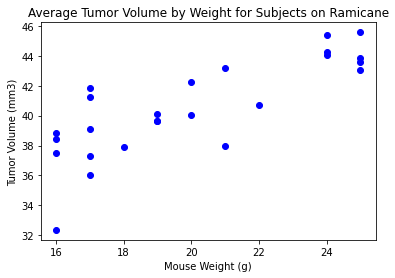

In [264]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Ramicane regimen
ramicane_group = ramicane_df.groupby('Mouse ID').mean()


x2 = ramicane_group['Weight (g)'].tolist()
y2 = ramicane_group['Tumor Volume (mm3)'].tolist()
plt.scatter(x2, y2, color='blue')
plt.title('Average Tumor Volume by Weight for Subjects on Ramicane')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

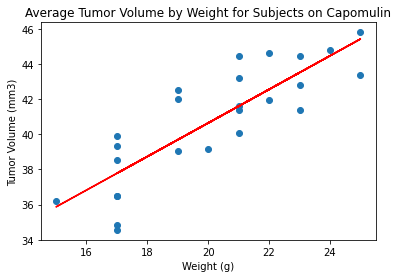

The correlation coefficent is: 0.84


In [276]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x3 = capomulin_group['Weight (g)']
y3 = capomulin_group['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x3, y3)
regress_values = x3 * slope + intercept
# line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x3, y3)
plt.plot(x3,regress_values,"r-")
plt.title('Average Tumor Volume by Weight for Subjects on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"The correlation coefficent is: {round(st.pearsonr(x3,y3)[0],2)}")

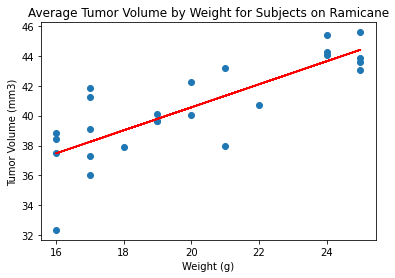

The correlation coefficent is: 0.81


In [275]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Ramicane regimen
x4 = ramicane_group['Weight (g)']
y4 = ramicane_group['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x4, y4)
regress_values = x4 * slope + intercept
plt.scatter(x4, y4)
plt.plot(x4,regress_values,"r-")
plt.title('Average Tumor Volume by Weight for Subjects on Ramicane')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"The correlation coefficent is: {round(st.pearsonr(x4,y4)[0],2)}")